This is week 2 for the final assignment of the capstone project.
Here we are comparing the two cities of Rajasthan state of India : Jaipur and Udaipur.
Both cities have historic places, tourist places, cafes and restaurants and markets.
It can be a good project to compare the two cities and check the similarity of the two cities.
The comparison can help an investor to figure out what business is profitable in which city and also can help tourists
to decide which city to visit first.
We fetch the data from foursquare API for both the cities. Then we plot the places on interest of both the cities on map
and make a detailed study.

In [1]:
!pip install folium

     |████████████████████████████████| 102kB 6.8MB/s ta 0:00:011


In [50]:
from geopy.geocoders import Nominatim 
import folium
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Foursquare API configuration
CLIENT_ID = '44TLKI2RQKYUZGS0PUP2EG3YD1U2FQU1DJPMG4W4SEVSXR3V' 
CLIENT_SECRET = 'EEPPCM3JRVRDSUFJ0QW2C3UYRQIIA15JB5OKTHFBZH4LKBEK'
VERSION = '20200104'
LIMIT = 1000
radius = 10000

In [4]:
address = 'Jaipur, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
jaipur_latitude = location.latitude
jaipur_longitude = location.longitude
print('the coordinates of jaipur are lat: {} and long: {}'.format(jaipur_latitude, jaipur_longitude))

the coordinates of jaipur are lat: 26.916194 and long: 75.820349


In [14]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                                                                          CLIENT_SECRET,
                                                                                                                          jaipur_latitude,
                                                                                                                          jaipur_longitude,
                                                                                                                          VERSION,
                                                                                                                          radius, LIMIT)

results = requests.get(url).json()


neighborhoods_data = results['response']['venues']# define the dataframe columns
column_names = ['Name', 'Category', 'Latitude', 'Longitude'] 

# instantiate the dataframe
jaipur_neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    neighborhood_name = data['name']
    neighborhood_lat = data['location']['lat']
    neighborhood_lon = data['location']['lng']
    if(len(data['categories'])):
        neighborhood_categories = data['categories'][0]['name']
    else:
        neighborhood_categories = None
    jaipur_neighborhoods = jaipur_neighborhoods.append({'Name': neighborhood_name,
                                          'Category': neighborhood_categories,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [15]:
address = 'Udaipur, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
udaipur_latitude = location.latitude
udaipur_longitude = location.longitude
print('the coordinates of udaipur are lat: {} and long: {}'.format(udaipur_latitude, udaipur_longitude))

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                                                                          CLIENT_SECRET,
                                                                                                                          udaipur_latitude,
                                                                                                                          udaipur_longitude,
                                                                                                                          VERSION,
                                                                                                                          radius, LIMIT)

results = requests.get(url).json()


neighborhoods_data = results['response']['venues']# define the dataframe columns
column_names = ['Name', 'Category', 'Latitude', 'Longitude'] 

# instantiate the dataframe
udaipur_neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    neighborhood_name = data['name']
    neighborhood_lat = data['location']['lat']
    neighborhood_lon = data['location']['lng']
    if(len(data['categories'])):
        neighborhood_categories = data['categories'][0]['name']
    else:
        neighborhood_categories = None
    udaipur_neighborhoods = udaipur_neighborhoods.append({'Name': neighborhood_name,
                                          'Category': neighborhood_categories,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

the coordinates of udaipur are lat: 24.578721 and long: 73.6862571


In [16]:
print("shape of Jaipur : {} and shape of udaipur : {}".format(jaipur_neighborhoods.shape, udaipur_neighborhoods.shape))

shape of Jaipur : (110, 4) and shape of udaipur : (125, 4)


In [77]:
def get_near_by_venues(venues_df, radius=10000):
    
    venues_list=[]
    names = venues_df["Name"]
    latitudes = venues_df["Latitude"]
    longitudes = venues_df["Longitude"]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except Exception as e:
            print(url, e)
            break
        # return only relevant information for each nearby venue
        venues_list.append([(
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Latitude', 
                  'Longitude', 
                  'Category']
    
    return(pd.concat([venues_df, nearby_venues], axis=0))


In [60]:
# filter none column
none_udaipur_neighborhoods = udaipur_neighborhoods[udaipur_neighborhoods['Category'].isnull()]
print(none_udaipur_neighborhoods)
none_jaipur_neighborhoods = jaipur_neighborhoods[jaipur_neighborhoods['Category'].isnull()]
print(none_jaipur_neighborhoods)

Empty DataFrame
Columns: [Name, Category, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [Name, Category, Latitude, Longitude]
Index: []


In [57]:
# let us fill null with not known
udaipur_neighborhoods.fillna("not known", inplace=True)

In [59]:
# let us fill null with not known
jaipur_neighborhoods.fillna("not known", inplace=True)

In [63]:
print(np.unique(jaipur_neighborhoods.Category))
jaipur_neighborhoods.Category.value_counts()

['Art Museum' 'Arts & Crafts Store' 'Bank' 'Bed & Breakfast' 'Building'
 'Café' 'Clothing Store' 'Coffee Shop' 'Department Store' 'Design Studio'
 'Dessert Shop' 'Distribution Center' 'Emergency Room' 'Exhibit'
 'Fast Food Restaurant' 'Field' 'Flea Market' 'Food' 'Food Court'
 'Food Stand' 'Furniture / Home Store' 'Garden' 'Gift Shop'
 'Government Building' 'High School' 'Historic Site' 'History Museum'
 'Hospital' 'Hotel' 'Ice Cream Shop' 'Indian Restaurant' 'Jewelry Store'
 'Juice Bar' 'Lake' 'Laundry Service' 'Market' "Men's Store"
 'Miscellaneous Shop' 'Motorcycle Shop' 'Movie Theater'
 'Multicuisine Indian Restaurant' 'Multiplex' 'Museum' 'Non-Profit'
 'North Indian Restaurant' 'Office' 'Pharmacy' 'Shoe Store'
 'Shopping Mall' 'Shopping Plaza' 'Souvenir Shop' 'Spa' 'Tea Room'
 'Temple' "Women's Store" 'Zoo' 'not known']


Indian Restaurant                 7
Bank                              7
Jewelry Store                     6
not known                         6
Clothing Store                    5
Ice Cream Shop                    4
Office                            4
Arts & Crafts Store               4
Miscellaneous Shop                3
Historic Site                     3
Hospital                          3
Women's Store                     3
Hotel                             2
Multiplex                         2
Art Museum                        2
Tea Room                          2
Dessert Shop                      2
Men's Store                       2
Museum                            2
Building                          2
Market                            2
Shopping Mall                     2
Souvenir Shop                     1
Bed & Breakfast                   1
History Museum                    1
Food                              1
High School                       1
Department Store            

In [86]:
jaipur_venues = get_near_by_venues(jaipur_neighborhoods)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [87]:
udaipur_venues = get_near_by_venues(udaipur_neighborhoods)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [89]:
jaipur_venues.shape
udaipur_venues.shape

(7875, 4)

In [90]:
jaipur_places = jaipur_venues.copy()
udaipur_places = udaipur_venues.copy()

In [91]:
print("shape before drop {}, {}".format(jaipur_places.shape,udaipur_places.shape))
jaipur_places.drop_duplicates(inplace=True)
udaipur_places.drop_duplicates(inplace=True)
print("shape after drop {}, {}".format(jaipur_places.shape,udaipur_places.shape))

shape before drop (6213, 4), (7875, 4)
shape after drop (217, 4), (177, 4)


In [96]:
jaipur_places.Category.value_counts()

Hotel                             28
Indian Restaurant                 19
Café                              10
Historic Site                      9
Bank                               7
Ice Cream Shop                     6
Clothing Store                     6
Jewelry Store                      6
not known                          6
Arts & Crafts Store                5
Shopping Mall                      4
Coffee Shop                        4
Tea Room                           4
Office                             4
Multiplex                          4
Bakery                             3
Hospital                           3
Art Museum                         3
Pizza Place                        3
Women's Store                      3
Miscellaneous Shop                 3
Dessert Shop                       3
Juice Bar                          2
Lounge                             2
Men's Store                        2
Restaurant                         2
Museum                             2
M

In [97]:
udaipur_places.Category.value_counts()

Hotel                            40
Indian Restaurant                17
Café                             10
Restaurant                        8
Resort                            7
Historic Site                     6
Tailor Shop                       5
Bed & Breakfast                   5
not known                         4
Arts & Crafts Store               4
Coffee Shop                       3
Hostel                            3
History Museum                    3
Rajasthani Restaurant             3
Roof Deck                         3
Lake                              3
Vegetarian / Vegan Restaurant     3
Bank                              2
Spa                               2
Temple                            2
Palace                            1
Dessert Shop                      1
Castle                            1
Boat or Ferry                     1
North Indian Restaurant           1
Asian Restaurant                  1
Cemetery                          1
Scenic Lookout              

In [98]:
# create map of Udaipur using latitude and longitude values
map_udaipur = folium.Map(location=[udaipur_latitude, udaipur_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(udaipur_places['Latitude'], udaipur_places['Longitude'], udaipur_places['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_udaipur)  
    
map_udaipur

In [99]:
# create map of jaipur using latitude and longitude values
map_jaipur = folium.Map(location=[jaipur_latitude, jaipur_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(jaipur_places['Latitude'], jaipur_places['Longitude'], jaipur_places['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jaipur)  
    
map_jaipur

In [100]:
print("Top 10 categories in Jaipur")
print(jaipur_places.Category.value_counts()[:10])
print("Top 10 categories in udaipur")
print(udaipur_places.Category.value_counts()[:10])

Top 10 categories in Jaipur
Hotel                  28
Indian Restaurant      19
Café                   10
Historic Site           9
Bank                    7
Ice Cream Shop          6
Clothing Store          6
Jewelry Store           6
not known               6
Arts & Crafts Store     5
Name: Category, dtype: int64
Top 10 categories in udaipur
Hotel                  40
Indian Restaurant      17
Café                   10
Restaurant              8
Resort                  7
Historic Site           6
Tailor Shop             5
Bed & Breakfast         5
not known               4
Arts & Crafts Store     4
Name: Category, dtype: int64


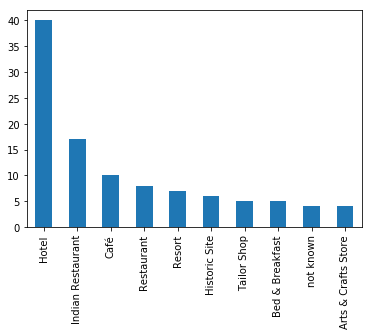

In [105]:
udaipur_places.Category.value_counts()[:10].plot(kind = 'bar')


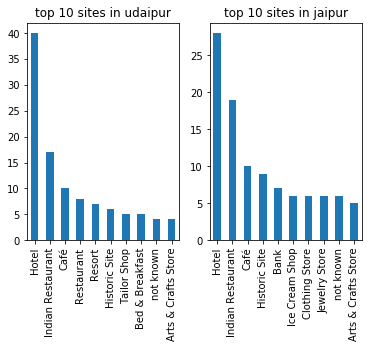

In [112]:
plt.subplot(1,2,1)

udaipur_places.Category.value_counts()[:10].plot(kind = 'bar')
plt.title("top 10 sites in udaipur")
plt.subplot(1,2,2)
plt.title("top 10 sites in jaipur")
jaipur_places.Category.value_counts()[:10].plot(kind = 'bar')

In [ ]:
# reset indices of both the dataframes
jaipur_places.reset_index(inplace=True, drop=True)
jaipur_places.drop(["index"], axis= 1, inplace=True)

In [ ]:
udaipur_places.reset_index(inplace=True, drop=True)
udaipur_places.drop(["index"], axis= 1, inplace=True)

In [165]:
jaipur_color_list = ['None'] * jaipur_places.shape[0]
udaipur_color_list = ['None'] * udaipur_places.shape[0]

In [166]:
# get indicies of hotel and set the colors of hotel as blue
udaipur_hotel_indicies = udaipur_places.index[udaipur_places['Category'] == "Hotel"].tolist()
jaipur_hotel_indicies = jaipur_places.index[jaipur_places['Category'] == "Hotel"].tolist()

In [167]:
for i in jaipur_hotel_indicies:
    jaipur_color_list[i]='blue'
for j in udaipur_hotel_indicies:
    udaipur_color_list[j]='blue'    

In [168]:
# get indicies of Indian Restaurant  and set the colors of hotel as yellow
udaipur_ir_indicies = udaipur_places.index[udaipur_places['Category'] == "Indian Restaurant"].tolist()
jaipur_ir_indicies = jaipur_places.index[jaipur_places['Category'] == "Indian Restaurant"].tolist()

for i in jaipur_ir_indicies:
    jaipur_color_list[i]='yellow'
for j in udaipur_ir_indicies:
    udaipur_color_list[j]='yellow'    


In [169]:
# get indicies of Historic Site  and set the colors of hotel as green
udaipur_hs_indicies = udaipur_places.index[udaipur_places['Category'] == "Historic Site"].tolist()
jaipur_hs_indicies = jaipur_places.index[jaipur_places['Category'] == "Historic Site"].tolist()

for i in jaipur_hs_indicies:
    jaipur_color_list[i]='red'
for j in udaipur_hs_indicies:
    udaipur_color_list[j]='red'    

In [170]:
# create map of jaipur using latitude and longitude values
map_jaipur_final = folium.Map(location=[jaipur_latitude, jaipur_longitude], zoom_start=15)

# add markers to map
for lat, lng, label, color in zip(jaipur_places['Latitude'], jaipur_places['Longitude'], jaipur_places['Name'], jaipur_color_list):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_jaipur_final)  
    
map_jaipur_final

In [171]:
# create map of udaipur using latitude and longitude values
map_udaipur_final = folium.Map(location=[udaipur_latitude, udaipur_longitude], zoom_start=15)

# add markers to map
for lat, lng, label, color in zip(udaipur_places['Latitude'], udaipur_places['Longitude'], udaipur_places['Name'], udaipur_color_list):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_udaipur_final)  
    
map_udaipur_final